In [1]:
# To handle Paths
import os

# To remove Hyperlinks and Dates
import re

# To remove Puncutations
import string

# For Tokenization and Accessing Stopwords
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('punkt')

#from textblob import TextBlob

# Give the Path of our Data
Path_Of_Data ='E:/archive'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\king\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#when we add more sources we could use this
#Labels_List = os.listdir(Path_Of_Data)
#print(Labels_List)

In [4]:
df_health = pd.read_csv("E:/archive/mental-health-twitter.csv")

In [5]:
df_health

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


In [6]:
df_health.drop(columns=['post_id','Unnamed: 0'],inplace=True)

In [7]:
df_health

,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...
19995,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


<AxesSubplot:>

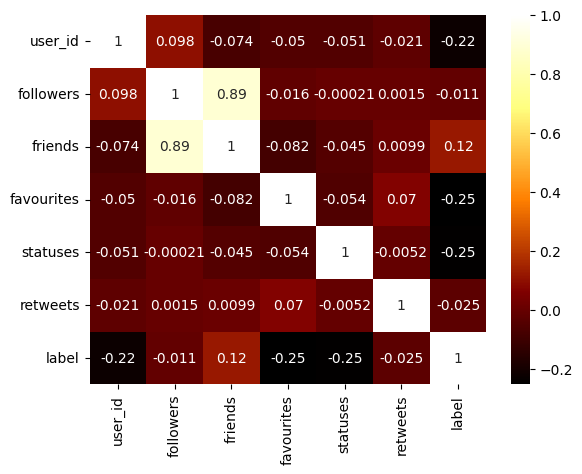

In [8]:
sns.heatmap(df_health.corr(),annot=True,cmap=plt.cm.afmhot)

In [9]:
df_health.corr()

,user_id,followers,friends,favourites,statuses,retweets,label
user_id,1.000000,0.098022,-0.073787,-0.050215,-0.050672,-0.020921,-0.220954
followers,0.098022,1.000000,0.891919,-0.016242,-0.000215,0.001500,-0.011181
friends,-0.073787,0.891919,1.000000,-0.081756,-0.045420,0.009946,0.119818
favourites,-0.050215,-0.016242,-0.081756,1.000000,-0.053930,0.069551,-0.252289
statuses,-0.050672,-0.000215,-0.045420,-0.053930,1.000000,-0.005193,-0.246473
retweets,-0.020921,0.001500,0.009946,0.069551,-0.005193,1.000000,-0.025198
label,-0.220954,-0.011181,0.119818,-0.252289,-0.246473,-0.025198,1.000000


In [10]:
#import seaborn as sns
#sns.pairplot(df_health)

#from above we see followers and friends are highky correlated, we could use one of them

In [11]:
df_health['post_created'] = pd.to_datetime(df_health['post_created'],infer_datetime_format=True)
df_health['weekday'] = df_health['post_created'].dt.weekday 
df_health['month'] = df_health['post_created'].dt.month
df_health['day'] = df_health['post_created'].dt.day
df_health['year'] = df_health['post_created'].dt.year


In [12]:
df_health

,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,weekday,month,day,year
0,2015-08-30 07:48:37+00:00,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1,6,8,30,2015
1,2015-08-30 07:31:33+00:00,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1,6,8,30,2015
2,2015-08-29 22:11:07+00:00,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1,5,8,29,2015
3,2015-08-29 18:40:49+00:00,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1,5,8,29,2015
4,2015-08-29 18:40:26+00:00,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1,5,8,29,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2017-01-12 00:14:56+00:00,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0,3,1,12,2017
19996,2017-01-12 00:06:18+00:00,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0,3,1,12,2017
19997,2017-01-12 00:05:42+00:00,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0,3,1,12,2017
19998,2017-01-12 00:05:22+00:00,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0,3,1,12,2017


In [13]:
#df_health.drop(columns='post_created',inplace=True)
df_health

,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,weekday,month,day,year
0,2015-08-30 07:48:37+00:00,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1,6,8,30,2015
1,2015-08-30 07:31:33+00:00,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1,6,8,30,2015
2,2015-08-29 22:11:07+00:00,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1,5,8,29,2015
3,2015-08-29 18:40:49+00:00,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1,5,8,29,2015
4,2015-08-29 18:40:26+00:00,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1,5,8,29,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2017-01-12 00:14:56+00:00,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0,3,1,12,2017
19996,2017-01-12 00:06:18+00:00,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0,3,1,12,2017
19997,2017-01-12 00:05:42+00:00,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0,3,1,12,2017
19998,2017-01-12 00:05:22+00:00,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0,3,1,12,2017


In [20]:
def Pre_Process_Data_And_Create_BOW(data, ngram_range=(1, 1)):
    BOW_List = []  # Creating empty list
    Label_Count = 0

    for text in data['post_text']:
        print("Original text:", text)
        # Parse the Data inside the file
        # Extract the Content of the File

        # Below Code removes the Hyperlinks, like LinkedIn Profile, Certifications, etc..
        HyperLink_Regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
        Text_Without_HL = re.sub(HyperLink_Regex, '', text, flags=re.MULTILINE)

        # Below Lines of Code will Remove Punctuations except the Useful Symbols like +, #, ., -, as they will be used as C++, C#, .Net, Data-Science, etc..
        Set_Of_All_Punctuations = set(string.punctuation)
        Important_Punctuations = {'#', '.', '+', '-'}  # Add more, if any other Punctuation is observed as Important

        # Below Set Comprises all the Punctuations, which can be Removed from the Text
        Punct_To_Be_Removed = Set_Of_All_Punctuations - Important_Punctuations

        Text_Without_Punct = ''.join(ch for ch in Text_Without_HL if ch not in Punct_To_Be_Removed)

        # Check if the below code is required
        new_text = ' '.join(Text_Without_Punct.split())

        # Below Code converts all the Words to Lowercase ======> Check if it has to come after Tokenization if Splitting Code is delet instead of integed
        lowercase = new_text.lower()

        # Code to Tokenize all the Words
        word_tokens = word_tokenize(lowercase)

        # Code to remove Stopwords
        stop_words = set(stopwords.words('english'))
        words = [w for w in word_tokens if not w in stop_words]

        # Code to remove emoticons
        Emoticon_Regex = r'(:-?\)|:-?\(|;-?\)|;-?\(|:-?D|:-?P|:-?O|:-?\\|:-?\/|:-?\||:-?@|:-?S|:-?\$|:-?%)'
        words = [re.sub(Emoticon_Regex, '', word) for word in words]

        print("Preprocessed text:", words)
        
        # Convert the list of words into string for CountVectorizer
        text = ' '.join(words)
        
        # Create CountVectorizer with n-gram option
        vectorizer = CountVectorizer(ngram_range=ngram_range)
        bow = vectorizer.fit_transform([text]).toarray()

        BOW_List.append(bow)

    return BOW_List


In [21]:
#calling the function and passing the path
BOW_List = Pre_Process_Data_And_Create_BOW(df_health)

Original text: It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.
Preprocessed text: ['2', 'years', 'since', 'diagnosed', '#', 'anxiety', '#', 'depression', '.', 'today', 'im', 'taking', 'moment', 'reflect', 'far', 'ive', 'come', 'since', '.']
Original text: It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...
Preprocessed text: ['sunday', 'need', 'break', 'im', 'planning', 'spend', 'little', 'time', 'possible', '#', 'a14', '...']
Original text: Awake but tired. I need to sleep but my brain has other ideas...
Preprocessed text: ['awake', 'tired', '.', 'need', 'sleep', 'brain', 'ideas', '...']
Original text: RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October's Sew on sale NOW! #yay http://t.co/…
Preprocessed text: ['rt', 'sewhq', '#', 'retro', 'bears', 'make', 'perfect', 'gifts', 'great', 'beginners', 'ge

ValueError: empty vocabulary; perhaps the documents only contain stop words

#In above case, the n-gram used is a unigram (or 1-gram), which means that each word is considered as a separate feature.

In [22]:
BOW_List

[['2',
  'years',
  'since',
  'diagnosed',
  '#',
  'anxiety',
  '#',
  'depression',
  '.',
  'today',
  'im',
  'taking',
  'moment',
  'reflect',
  'far',
  'ive',
  'come',
  'since',
  '.'],
 ['sunday',
  'need',
  'break',
  'im',
  'planning',
  'spend',
  'little',
  'time',
  'possible',
  '#',
  'a14',
  '...'],
 ['awake', 'tired', '.', 'need', 'sleep', 'brain', 'ideas', '...'],
 ['rt',
  'sewhq',
  '#',
  'retro',
  'bears',
  'make',
  'perfect',
  'gifts',
  'great',
  'beginners',
  'get',
  'stitching',
  'octobers',
  'sew',
  'sale',
  '#',
  'yay',
  '…'],
 ['’',
  'hard',
  'say',
  'whether',
  'packing',
  'lists',
  'making',
  'life',
  'easier',
  'reinforcing',
  'much',
  'still',
  'needs',
  '...',
  '#',
  'movinghouse',
  '#',
  'anxiety'],
 ['making', 'packing', 'lists', 'new', 'hobby', '...', '#', 'movinghouse'],
 ['point',
  'keeping',
  'stuff',
  'nostalgic',
  'reasons',
  'cross',
  'line',
  'plain',
  'old',
  'hoarding',
  '...',
  '#',
  'movin

# Feature Importance


Sometimes we have many columns and we want remove a few of them to make the learning faster but we do not know which columns are more important than others.

Fortuantly sklearn has a quick way to generate that report to us. We do that by using ExtraTreesRegressor model from Scikit-Learn's ensemble module. Extra Trees stands for extremely randomized trees, which is a tree-based ensemble method, usually used for regression and classification tasks. It is similar to Random Forest but it builds trees differently.

In [24]:
df_health.head(3)

,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,weekday,month,day,year
0,2015-08-30 07:48:37+00:00,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1,6,8,30,2015
1,2015-08-30 07:31:33+00:00,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1,6,8,30,2015
2,2015-08-29 22:11:07+00:00,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1,5,8,29,2015


In [29]:
from sklearn.ensemble import ExtraTreesRegressor

# Prepare Features (X)
X = df_health.drop(['label','post_created','post_text'], axis=1)  # Drop columns not used as features

# Prepare Target Variable (y)
y = df_health['label']  # Select the 'label' column as the target variable

# Initialize and train the model
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

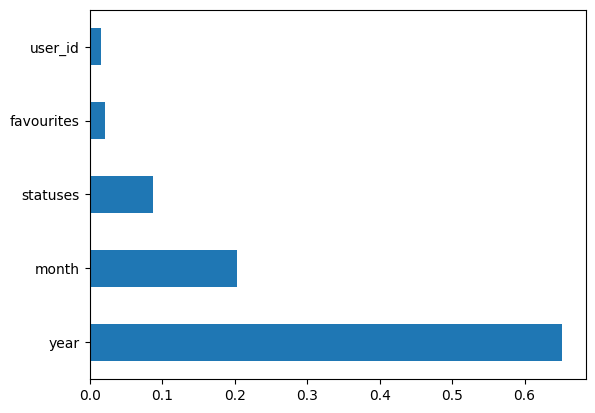

In [30]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [31]:
print(model.feature_importances_)

[1.60059795e-02 8.50110315e-03 3.45734394e-03 2.14361567e-02
 8.78853789e-02 0.00000000e+00 1.18747684e-05 2.03068534e-01
 8.00150794e-03 6.51632122e-01]
